# Generated dataset

Comparison of different inducing point GP-regression methods.

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_regression import GPR

%matplotlib inline

In [7]:
data_params = np.array([1.0, 0.3, 0.01])
data_covariance_obj = SquaredExponential(data_params)

In [8]:
num = 900
test_num = 300
dim = 2
seed = 10
n_classes = 3
y_trs, y_tes = [], []

np.random.seed(seed)
x_tr = np.random.normal(size=(dim, num)) / 3
x_te = np.random.normal(size=(dim, test_num)) / 3
for c in range(n_classes):
    gp = GPR(data_covariance_obj)
    y_tr, y_te = gp.generate_data(x_tr, x_te, seed=seed * c)
    y_trs.append(y_tr)
    y_tes.append(y_te)
y_trs = np.hstack(y_trs)
y_tes = np.hstack(y_tes)
y_tr = np.argmax(y_trs, axis=1)
y_te = np.argmax(y_tes, axis=1)
x_tr, x_te = x_tr.T, x_te.T

In [9]:
np.save('x_tr', x_tr)
np.save('y_tr', y_tr)
np.save('x_te', x_te)
np.save('y_te', y_te)

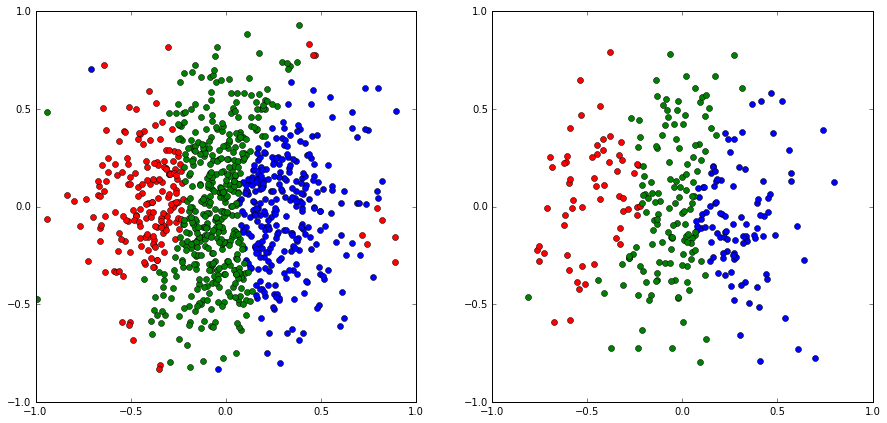

In [10]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
for c, col in zip(range(n_classes), ['ro', 'bo', 'go']):
    mask = (y_tr == c)
    plt.plot(x_tr[mask][:, 0], x_tr[mask][:, 1], col)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    
plt.subplot(1, 2, 2)
for c, col in zip(range(n_classes), ['ro', 'bo', 'go']):
    mask = (y_te == c)
    plt.plot(x_te[mask][:, 0], x_te[mask][:, 1], col)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
